# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [2]:
%run load_dataset.ipynb

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2001's data
Loading 2002's data
Finished loading


# Data Preprocessing

In [3]:
%run preprocessing.ipynb
# includes wavelet denoising, normalization, PCA, LDA, SVD, etc.

In [4]:
print(X_all.shape, y_all.shape)

(27881, 3) (27881,)


In [5]:
X_all

array([[-2.99275204e-01, -9.03566837e-01, -6.10765714e-04],
       [-3.04649949e-01, -9.05032653e-01,  4.64181969e-03],
       [-3.01229663e-01, -9.01612347e-01,  2.68736939e-03],
       ...,
       [-6.79415816e-01, -6.50709847e-01, -7.62235612e-02],
       [-7.21925102e-01, -8.41268673e-01, -9.33250051e-02],
       [-5.59705714e-01, -8.85243878e-01, -8.69730408e-02]])

# Group Data by Label and Normalize Data

In [6]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [7]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [8]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

In [9]:
# plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [10]:
roll, pitch, yaw = calc_rpy(X_all, subject_id, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape)

(27881, 3)


# Apply PCA

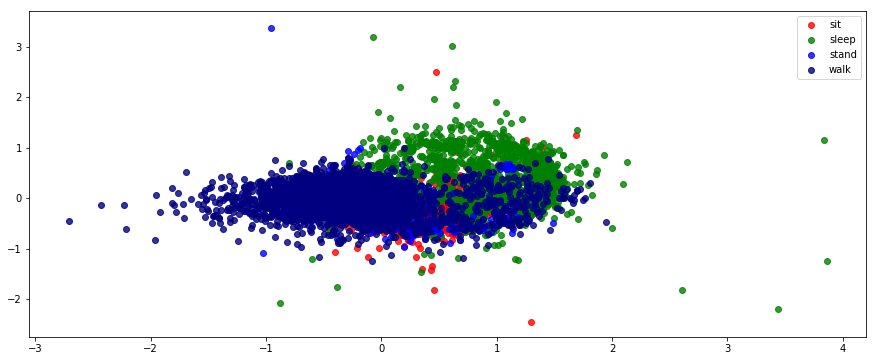

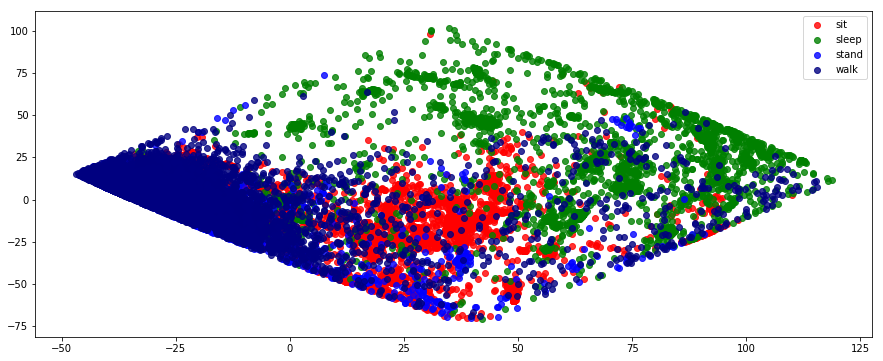

In [11]:
# apply PCA and LDA to X_norm and rpy
X_pca, pca = apply_pca(X_all, y_all, label_list)
rpy_pca, pca_rpy = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [12]:
# get label-separated X and y
X_pure, y_pure = prepare_pure_label(X_pca, y_all, subj_all, new_label_list)
y_pure = y_pure.reshape((y_pure.shape[0],))

In [13]:
print(X_pure.shape, y_pure.shape)

(24577, 180) (24577,)


# Reshape Data (Impure Label)

In [14]:
X_impure, y_impure = prepare_impure_label(X_pca, y_all)

In [15]:
print(X_impure.shape, y_impure.shape)

(27822, 180) (27822,)


# Split Train and Test Set

In [16]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_pure, y_pure, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(22257, 180)
(5565, 180)


In [17]:
print(X_train.shape)
print(X_test.shape)

(19661, 180)
(4916, 180)


# K-Nearest Neighbors

In [18]:
nn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [19]:
filename = 'model/knn_model.pkl'
pickle.dump(nn_model, open(filename, 'wb'))

In [20]:
y_pred = nn_model.predict(X_test)

In [21]:
nn_model_2 = nn_classifier(X_tr, y_tr)
print("Finished training")

Finished training


In [22]:
y_pred_2 = nn_model_2.predict(X_te)

## KNNEvaluation

In [23]:
%run eval_score.ipynb

In [24]:
LABELS = ['sit','sleep','stand','walk']

0.8285191212367778


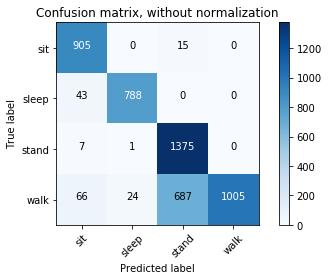

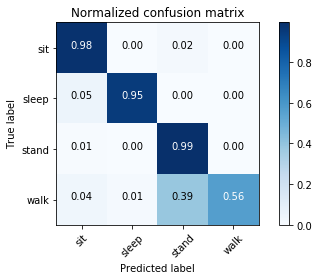

              precision    recall  f1-score   support

         sit       0.89      0.98      0.93       920
       sleep       0.97      0.95      0.96       831
       stand       0.66      0.99      0.79      1383
        walk       1.00      0.56      0.72      1782

   micro avg       0.83      0.83      0.83      4916
   macro avg       0.88      0.87      0.85      4916
weighted avg       0.88      0.83      0.82      4916



In [25]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

0.8230008984725966


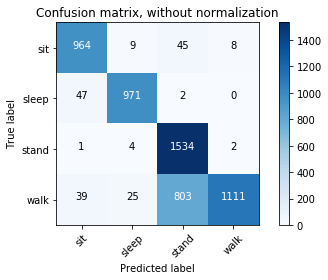

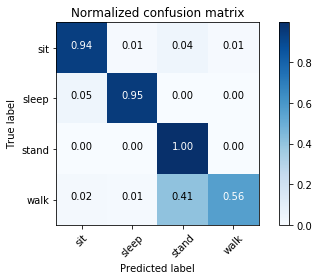

              precision    recall  f1-score   support

         sit       0.92      0.94      0.93      1026
       sleep       0.96      0.95      0.96      1020
       stand       0.64      1.00      0.78      1541
        walk       0.99      0.56      0.72      1978

   micro avg       0.82      0.82      0.82      5565
   macro avg       0.88      0.86      0.85      5565
weighted avg       0.88      0.82      0.82      5565



In [26]:
acc = accuracy_score(y_te, y_pred_2)
print(acc)

show_conf_matrix(y_te, y_pred_2, LABELS)
show_clf_report(y_te, y_pred_2, LABELS)

# Walk Algorithm

In [27]:
%run classifier_alg.ipynb

In [28]:
# classify walking
walk = calc_walk(X_all)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

# walk_stairs_exact_p = get_exact_walk_stairs(y_all)
walk_exact_p = get_exact_walk(y_all)
    
walk_pred = binarize_walk_prd(walk_pred_p, y_all)
# walk_stairs_exact = binarize_walk_prd(walk_stairs_exact_p, y_all)
walk_exact = binarize_walk_prd(walk_exact_p, y_all)

## Walk Algorithm Evaluation

In [29]:
walk_lbl = ['NaN','walk']

0.91427854094186


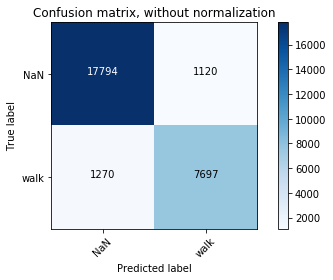

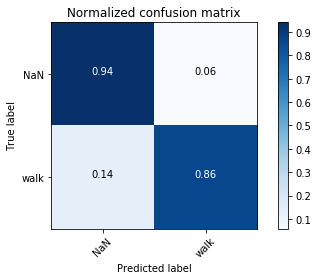

              precision    recall  f1-score   support

         NaN       0.93      0.94      0.94     18914
        walk       0.87      0.86      0.87      8967

   micro avg       0.91      0.91      0.91     27881
   macro avg       0.90      0.90      0.90     27881
weighted avg       0.91      0.91      0.91     27881



In [30]:
acc = accuracy_score(walk_exact, walk_pred)
print(acc)

show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [31]:
y_pred_new = combine(X_test, y_pred)

0.9332790886899919


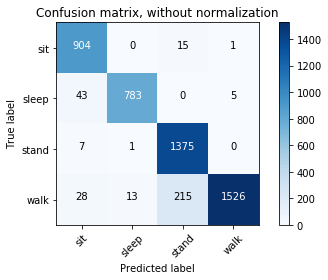

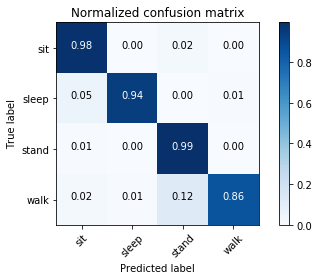

              precision    recall  f1-score   support

         sit       0.92      0.98      0.95       920
       sleep       0.98      0.94      0.96       831
       stand       0.86      0.99      0.92      1383
        walk       1.00      0.86      0.92      1782

   micro avg       0.93      0.93      0.93      4916
   macro avg       0.94      0.94      0.94      4916
weighted avg       0.94      0.93      0.93      4916



In [32]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [44]:
%run test_model.ipynb

In [34]:
filename = 'model/knn_model.pkl'

model = pickle.load(open(filename,'rb'))

In [35]:
all_subjects = [str(i) for i in range(1001,1009)]
all_subjects.append('2001')
all_subjects.append('2002')

Loading 1001's data
Finished prediction


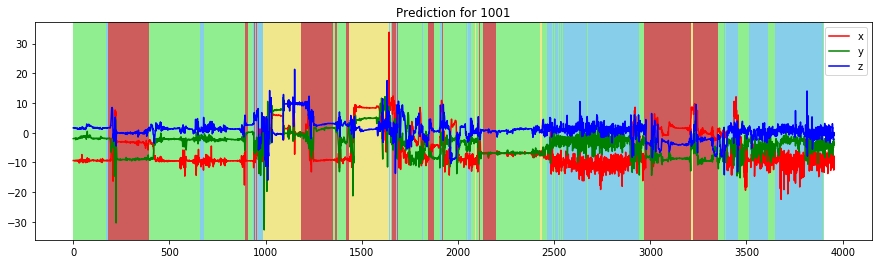

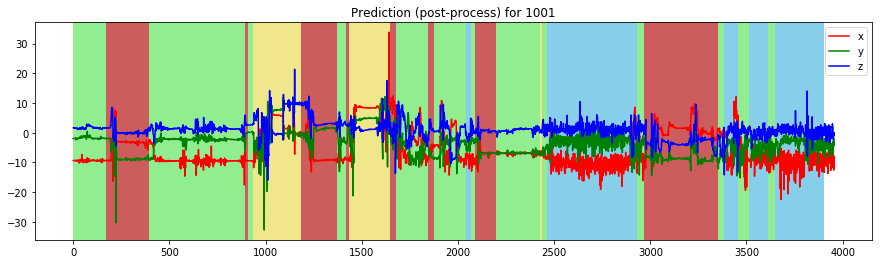

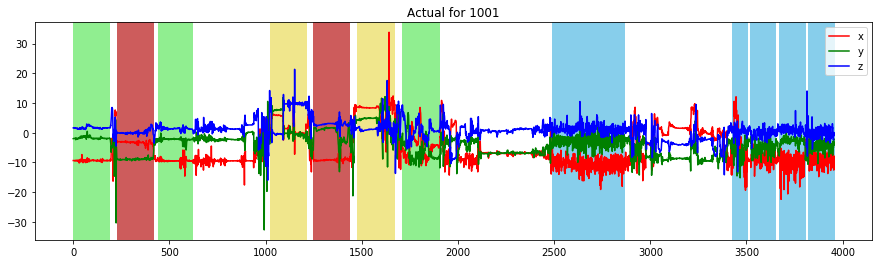

0.8655784925588094


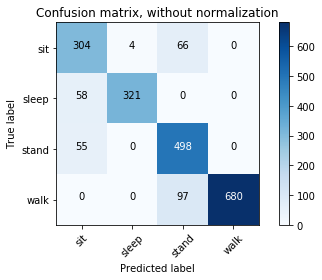

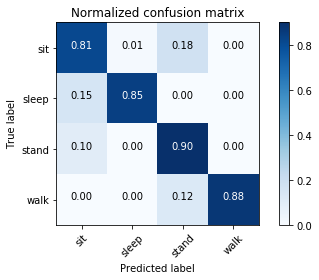

              precision    recall  f1-score   support

         sit       0.73      0.81      0.77       374
       sleep       0.99      0.85      0.91       379
       stand       0.75      0.90      0.82       553
        walk       1.00      0.88      0.93       777

   micro avg       0.87      0.87      0.87      2083
   macro avg       0.87      0.86      0.86      2083
weighted avg       0.88      0.87      0.87      2083

Loading 1002's data
Finished prediction


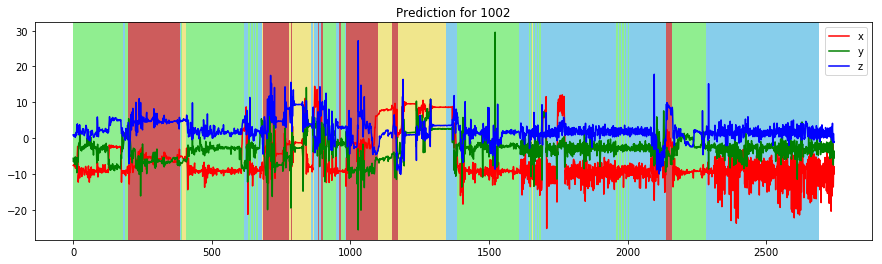

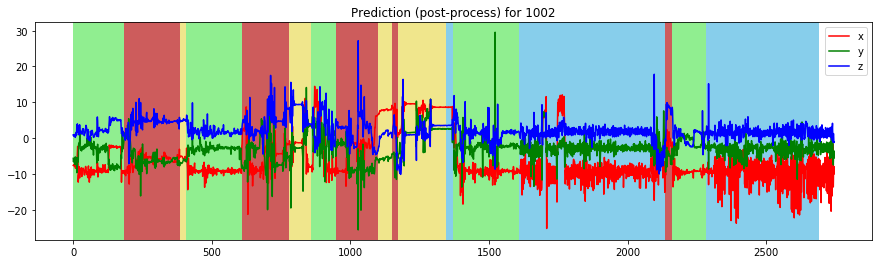

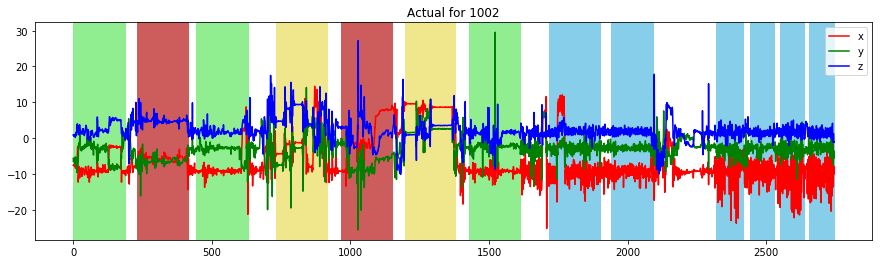

0.8692307692307693


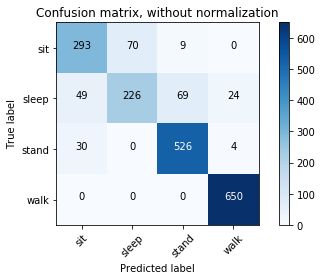

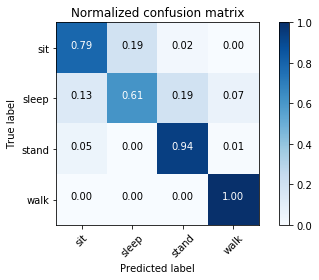

              precision    recall  f1-score   support

         sit       0.79      0.79      0.79       372
       sleep       0.76      0.61      0.68       368
       stand       0.87      0.94      0.90       560
        walk       0.96      1.00      0.98       650

   micro avg       0.87      0.87      0.87      1950
   macro avg       0.85      0.84      0.84      1950
weighted avg       0.86      0.87      0.86      1950

Loading 1003's data
Finished prediction


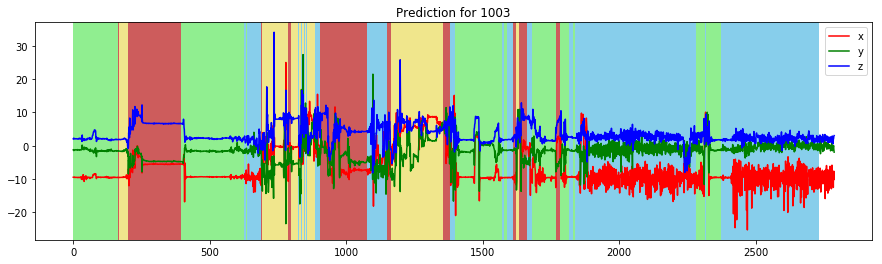

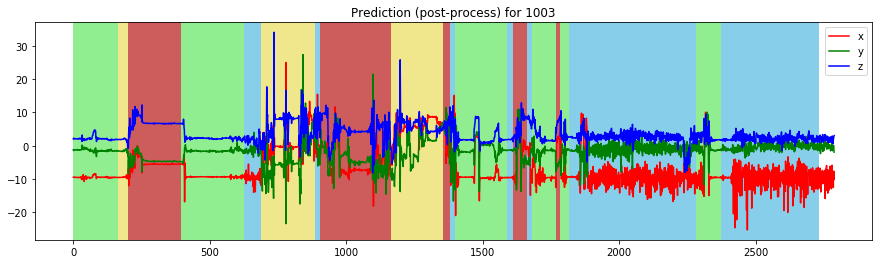

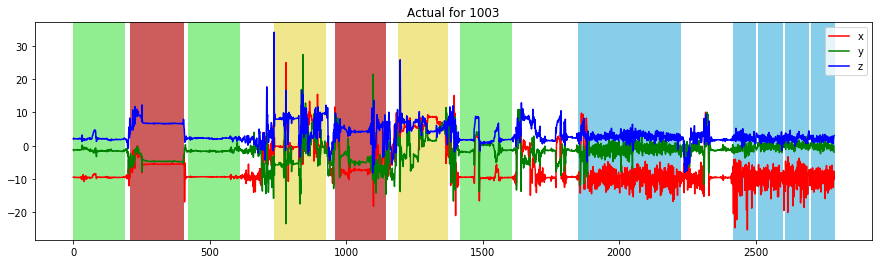

0.9460285132382892


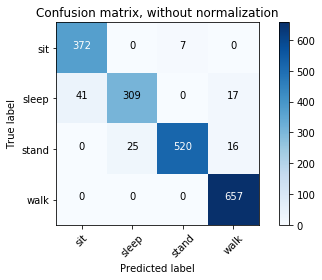

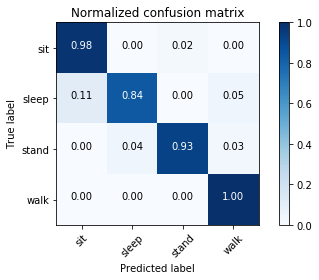

              precision    recall  f1-score   support

         sit       0.90      0.98      0.94       379
       sleep       0.93      0.84      0.88       367
       stand       0.99      0.93      0.96       561
        walk       0.95      1.00      0.98       657

   micro avg       0.95      0.95      0.95      1964
   macro avg       0.94      0.94      0.94      1964
weighted avg       0.95      0.95      0.95      1964

Loading 1004's data
Finished prediction


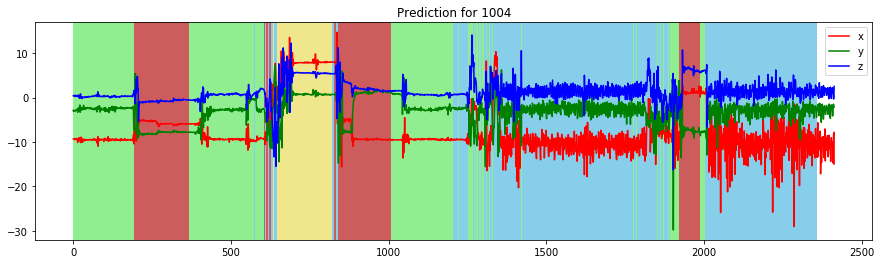

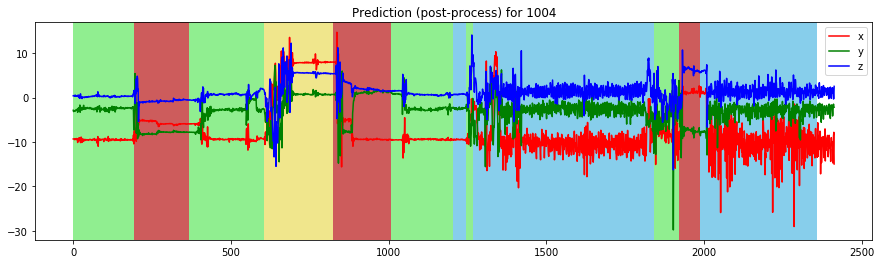

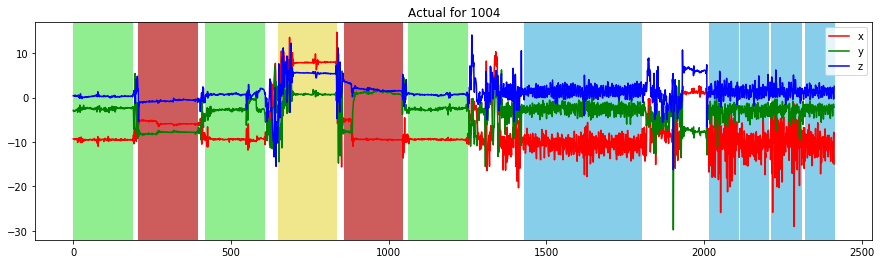

0.9340354767184036


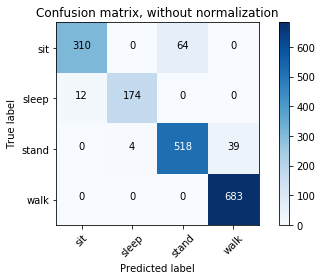

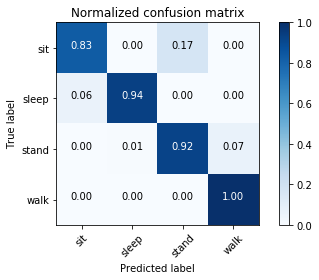

              precision    recall  f1-score   support

         sit       0.96      0.83      0.89       374
       sleep       0.98      0.94      0.96       186
       stand       0.89      0.92      0.91       561
        walk       0.95      1.00      0.97       683

   micro avg       0.93      0.93      0.93      1804
   macro avg       0.94      0.92      0.93      1804
weighted avg       0.94      0.93      0.93      1804

Loading 1005's data
Finished prediction


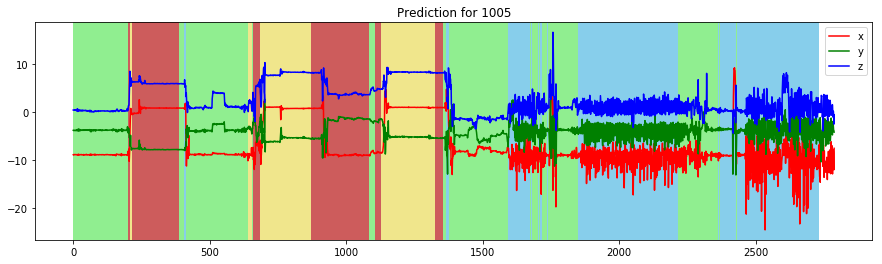

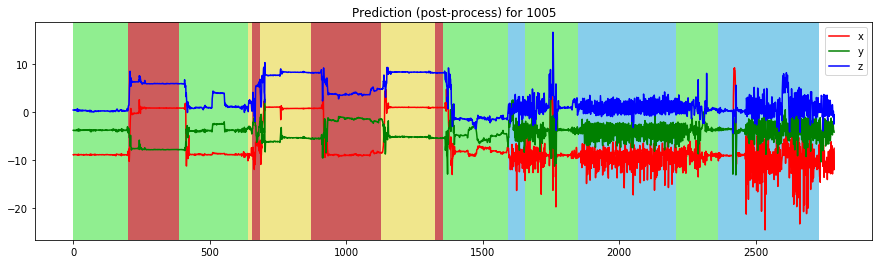

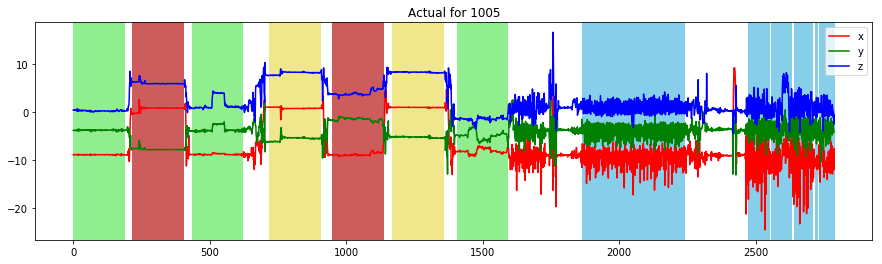

0.9364829396325459


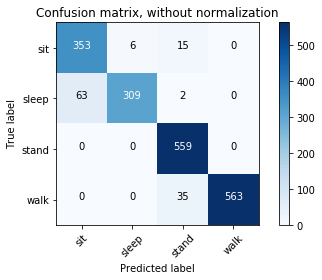

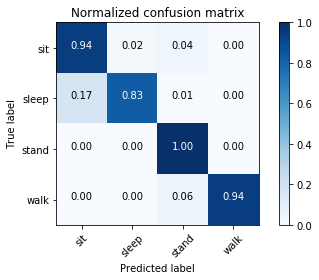

              precision    recall  f1-score   support

         sit       0.85      0.94      0.89       374
       sleep       0.98      0.83      0.90       374
       stand       0.91      1.00      0.96       559
        walk       1.00      0.94      0.97       598

   micro avg       0.94      0.94      0.94      1905
   macro avg       0.94      0.93      0.93      1905
weighted avg       0.94      0.94      0.94      1905

Loading 1006's data
Finished prediction


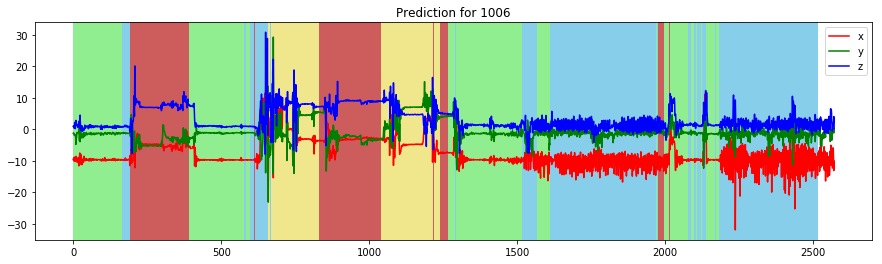

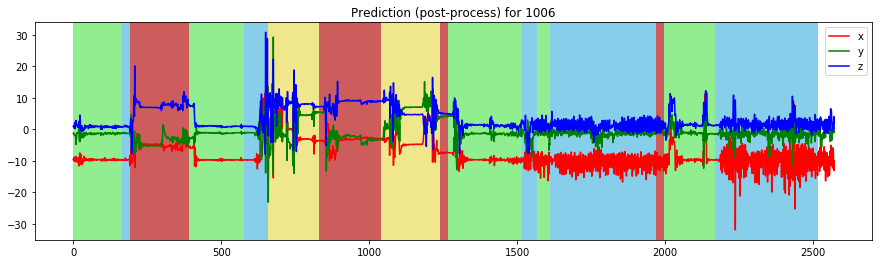

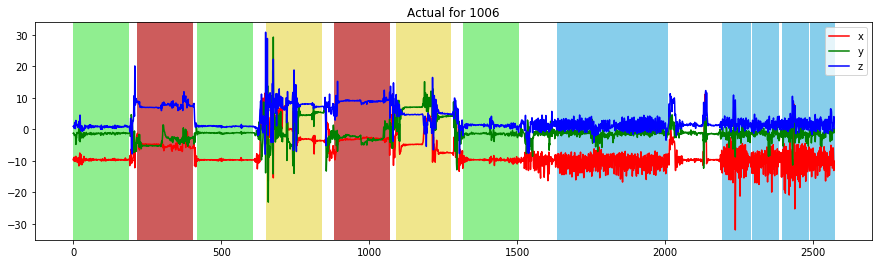

0.9075672930421533


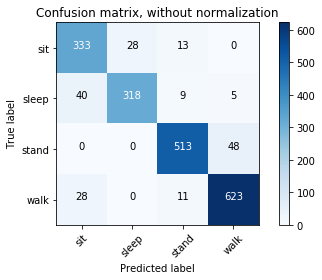

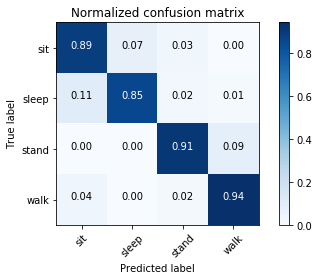

              precision    recall  f1-score   support

         sit       0.83      0.89      0.86       374
       sleep       0.92      0.85      0.89       372
       stand       0.94      0.91      0.93       561
        walk       0.92      0.94      0.93       662

   micro avg       0.91      0.91      0.91      1969
   macro avg       0.90      0.90      0.90      1969
weighted avg       0.91      0.91      0.91      1969

Loading 1007's data
Finished prediction


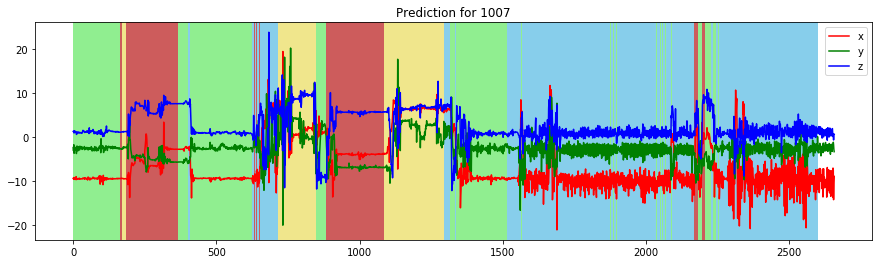

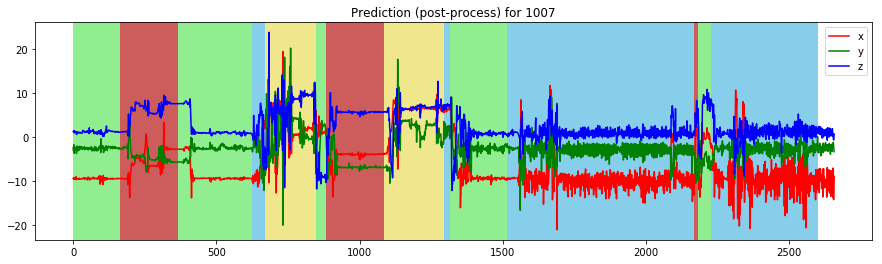

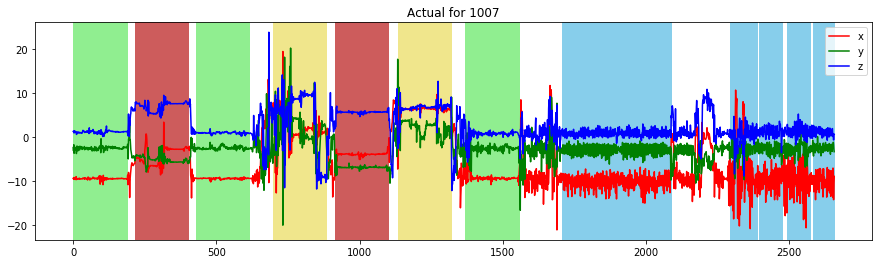

0.9070954568657479


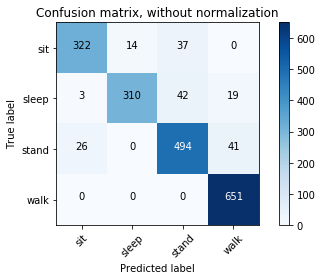

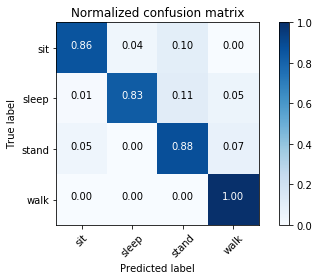

              precision    recall  f1-score   support

         sit       0.92      0.86      0.89       373
       sleep       0.96      0.83      0.89       374
       stand       0.86      0.88      0.87       561
        walk       0.92      1.00      0.96       651

   micro avg       0.91      0.91      0.91      1959
   macro avg       0.91      0.89      0.90      1959
weighted avg       0.91      0.91      0.91      1959

Loading 1008's data
Finished prediction


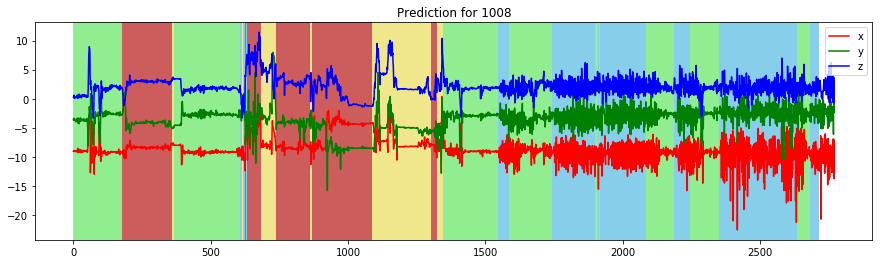

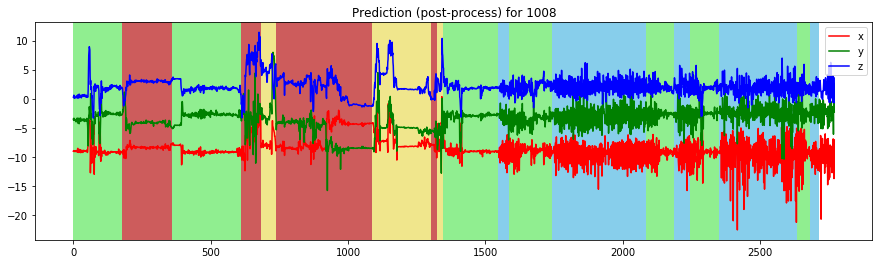

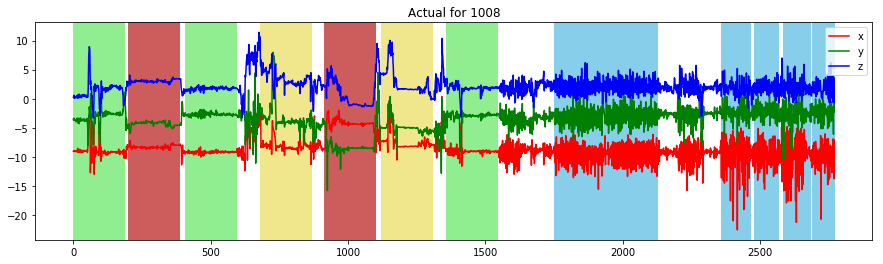

0.8611528822055138


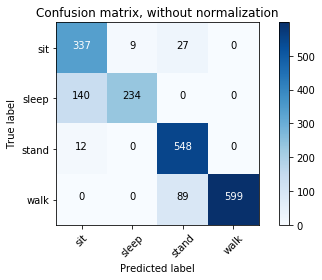

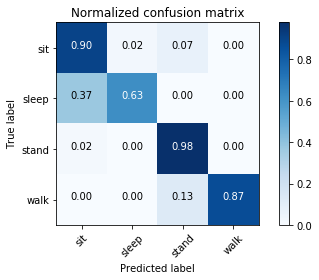

              precision    recall  f1-score   support

         sit       0.69      0.90      0.78       373
       sleep       0.96      0.63      0.76       374
       stand       0.83      0.98      0.90       560
        walk       1.00      0.87      0.93       688

   micro avg       0.86      0.86      0.86      1995
   macro avg       0.87      0.84      0.84      1995
weighted avg       0.89      0.86      0.86      1995

Loading 2001's data
Finished prediction


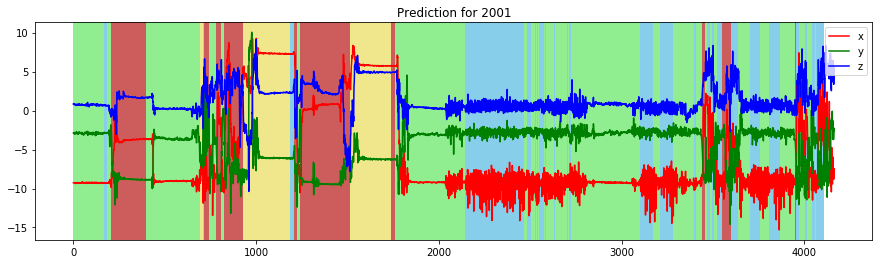

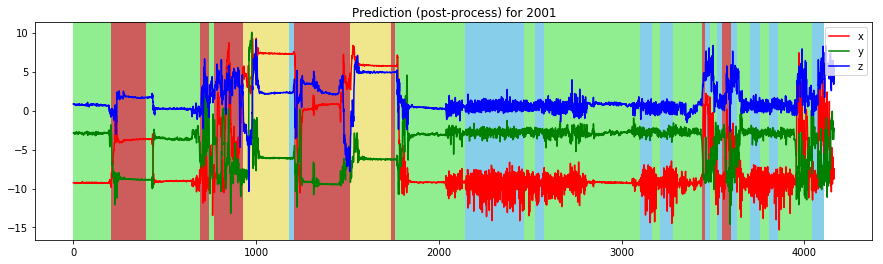

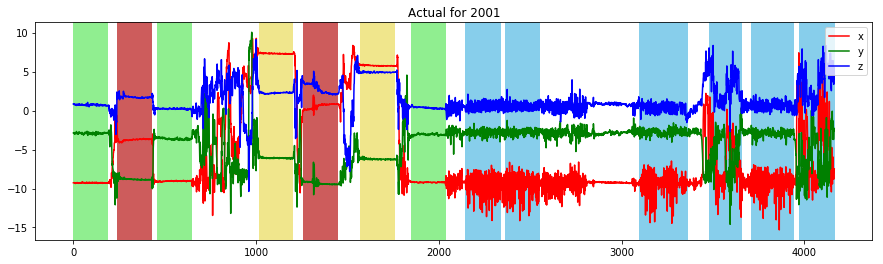

0.7477366255144033


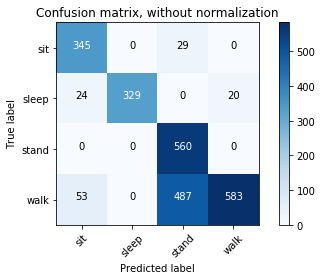

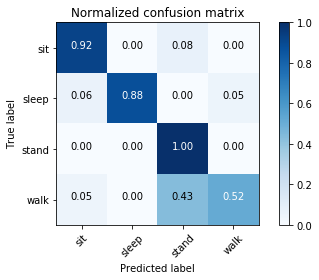

              precision    recall  f1-score   support

         sit       0.82      0.92      0.87       374
       sleep       1.00      0.88      0.94       373
       stand       0.52      1.00      0.68       560
        walk       0.97      0.52      0.68      1123

   micro avg       0.75      0.75      0.75      2430
   macro avg       0.83      0.83      0.79      2430
weighted avg       0.85      0.75      0.75      2430

Loading 2002's data
Finished prediction


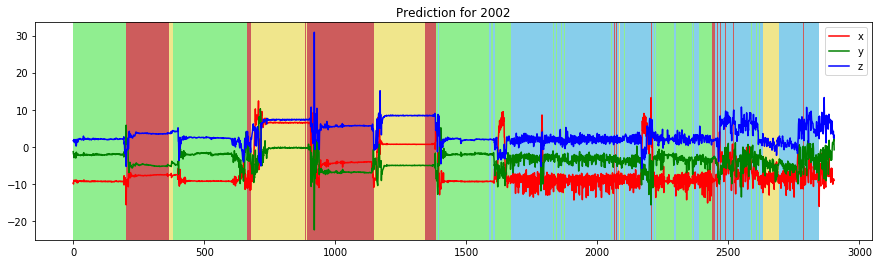

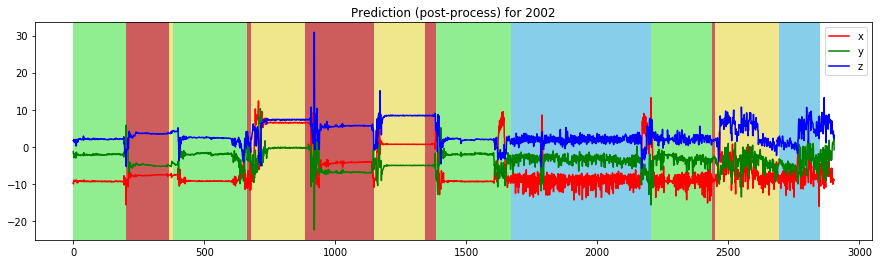

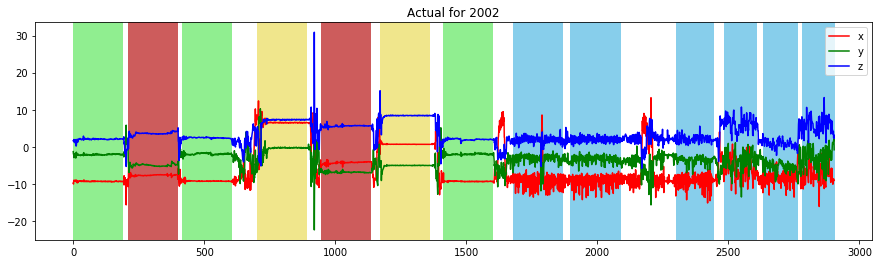

0.8087431693989071


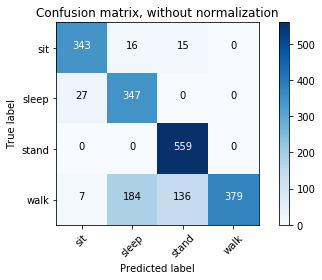

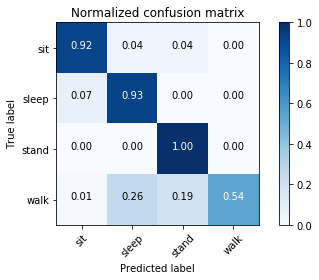

              precision    recall  f1-score   support

         sit       0.91      0.92      0.91       374
       sleep       0.63      0.93      0.75       374
       stand       0.79      1.00      0.88       559
        walk       1.00      0.54      0.70       706

   micro avg       0.81      0.81      0.81      2013
   macro avg       0.83      0.85      0.81      2013
weighted avg       0.86      0.81      0.80      2013



In [36]:
call_functions(all_subjects)

In [37]:
all_subjects.append('3001')
all_subjects.append('3002')
all_subjects.append('3003')
all_subjects.append('3004')
all_subjects.append('3005')
all_subjects.append('3006')

Loading 3001's data
Finished prediction


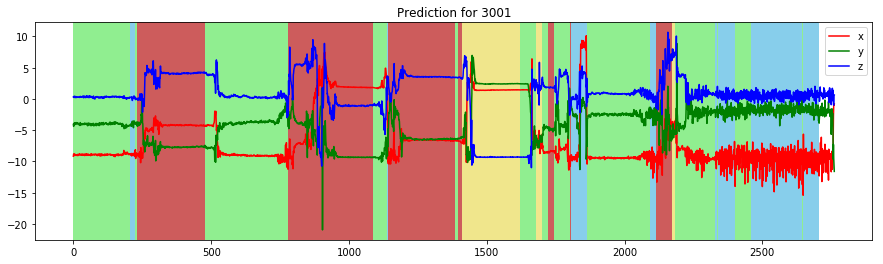

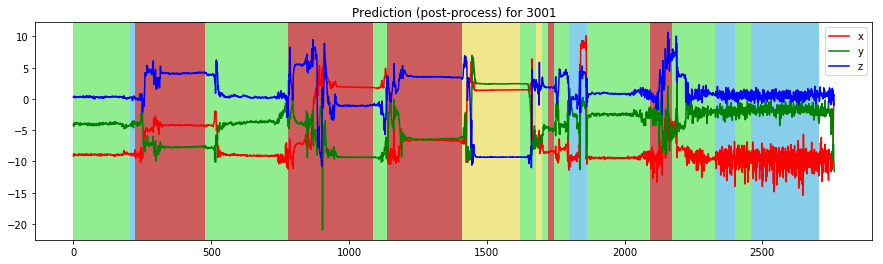

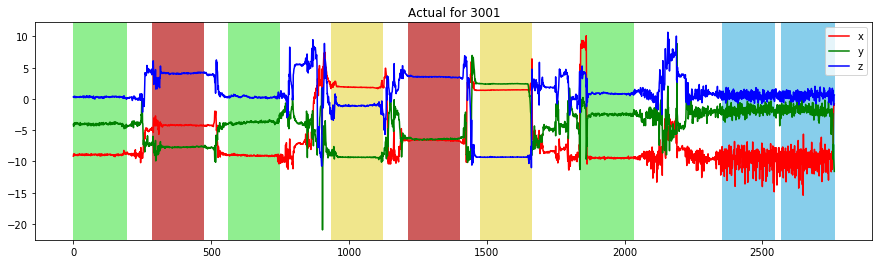

0.8116207951070337


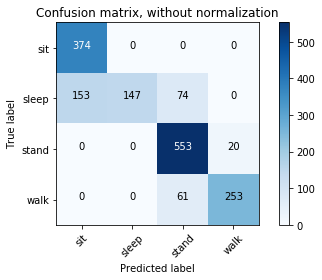

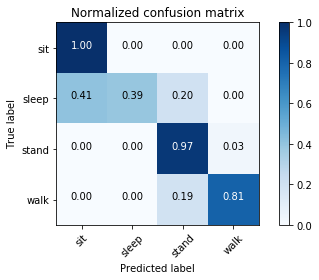

              precision    recall  f1-score   support

         sit       0.71      1.00      0.83       374
       sleep       1.00      0.39      0.56       374
       stand       0.80      0.97      0.88       573
        walk       0.93      0.81      0.86       314

   micro avg       0.81      0.81      0.81      1635
   macro avg       0.86      0.79      0.78      1635
weighted avg       0.85      0.81      0.79      1635

Loading 3002's data
Finished prediction


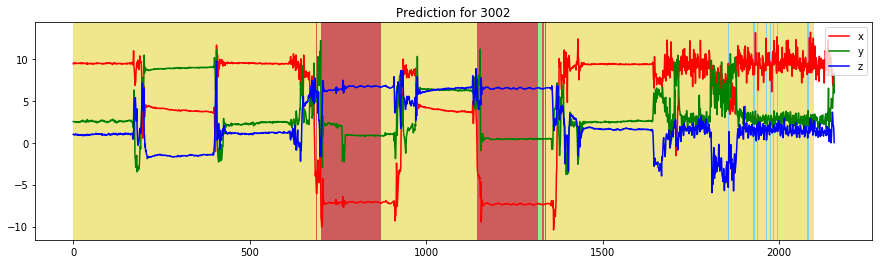

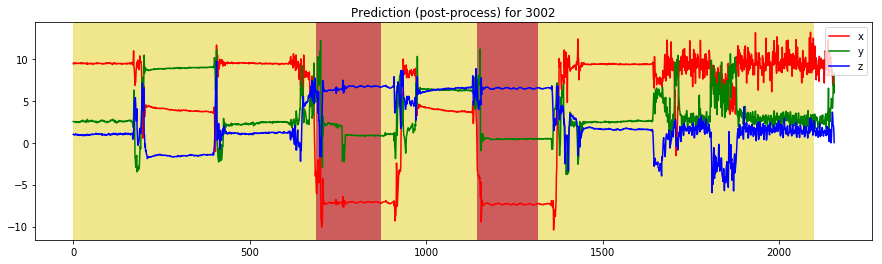

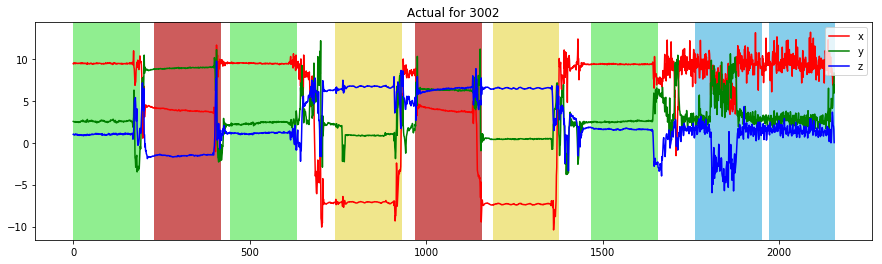

0.07881773399014778


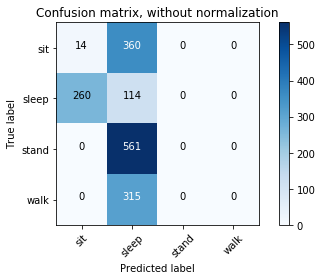

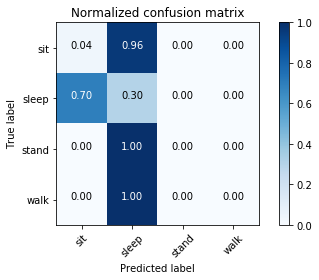

C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.05      0.04      0.04       374
       sleep       0.08      0.30      0.13       374
       stand       0.00      0.00      0.00       561
        walk       0.00      0.00      0.00       315

   micro avg       0.08      0.08      0.08      1624
   macro avg       0.03      0.09      0.04      1624
weighted avg       0.03      0.08      0.04      1624

Loading 3003's data
Finished prediction


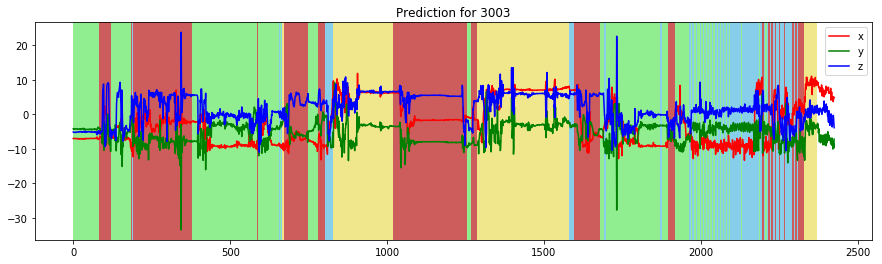

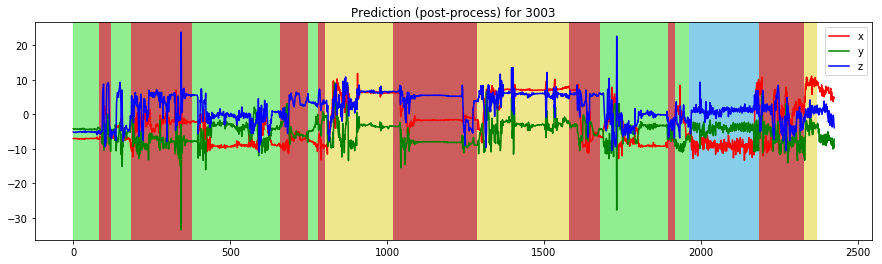

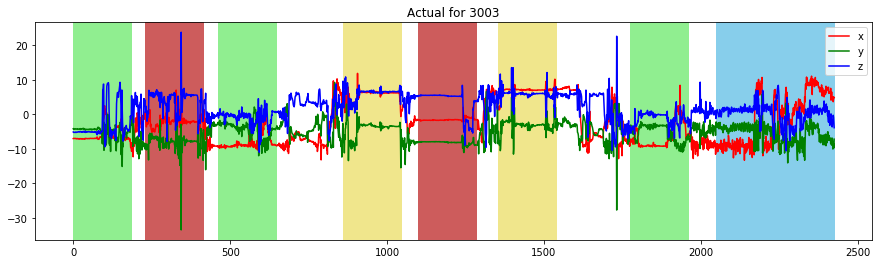

0.8054187192118226


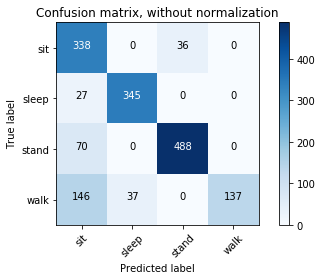

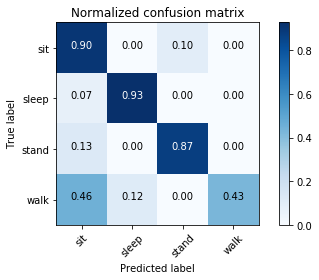

              precision    recall  f1-score   support

         sit       0.58      0.90      0.71       374
       sleep       0.90      0.93      0.92       372
       stand       0.93      0.87      0.90       558
        walk       1.00      0.43      0.60       320

   micro avg       0.81      0.81      0.81      1624
   macro avg       0.85      0.78      0.78      1624
weighted avg       0.86      0.81      0.80      1624

Loading 3004's data
Finished prediction


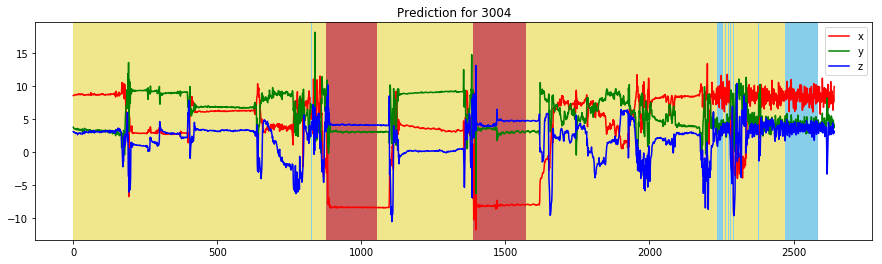

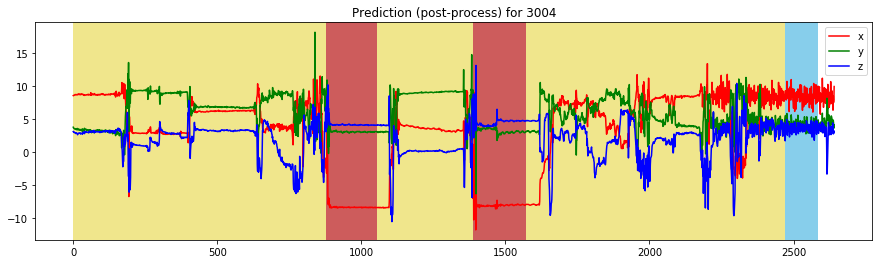

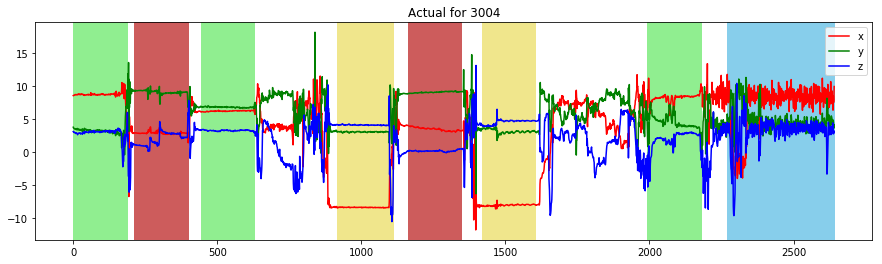

0.12277470841006753


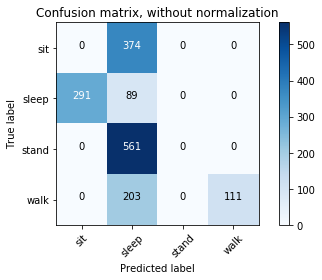

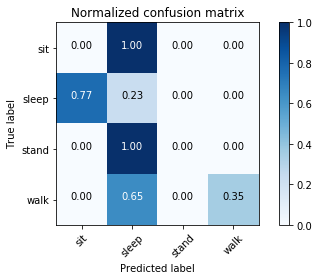

C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.00      0.00      0.00       374
       sleep       0.07      0.23      0.11       380
       stand       0.00      0.00      0.00       561
        walk       1.00      0.35      0.52       314

   micro avg       0.12      0.12      0.12      1629
   macro avg       0.27      0.15      0.16      1629
weighted avg       0.21      0.12      0.13      1629

Loading 3005's data
Finished prediction


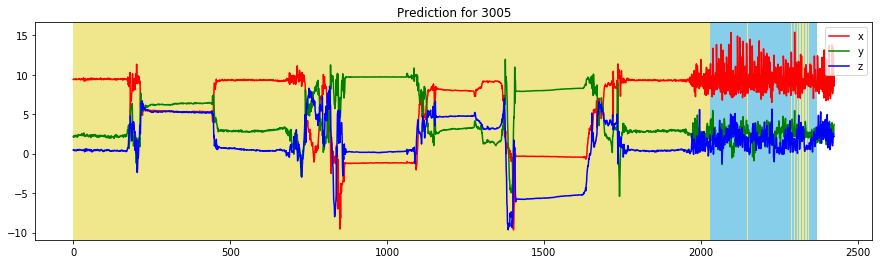

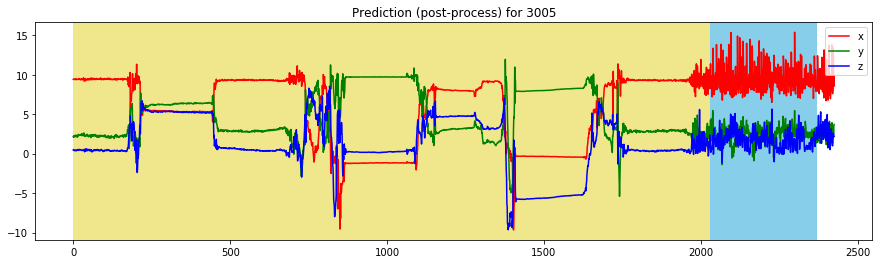

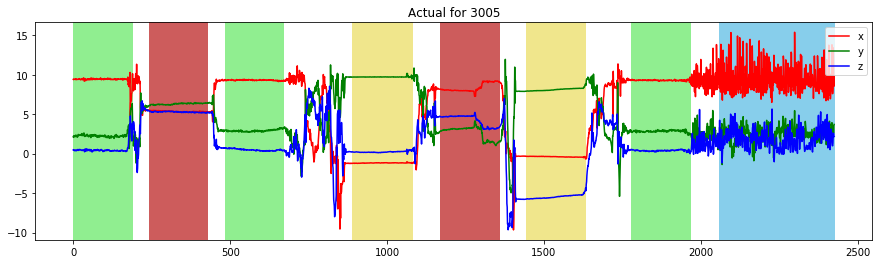

0.37416331994645247


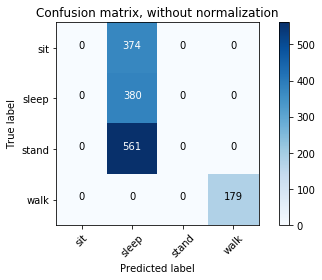

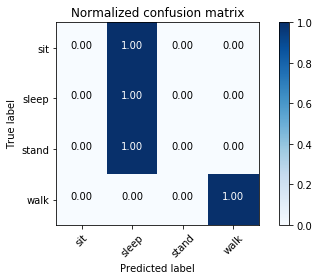

              precision    recall  f1-score   support

         sit       0.00      0.00      0.00       374
       sleep       0.29      1.00      0.45       380
       stand       0.00      0.00      0.00       561
        walk       1.00      1.00      1.00       179

   micro avg       0.37      0.37      0.37      1494
   macro avg       0.32      0.50      0.36      1494
weighted avg       0.19      0.37      0.23      1494



C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
new_data = [str(i) for i in range(3001,3006)]

call_functions(new_data)

Finished prediction


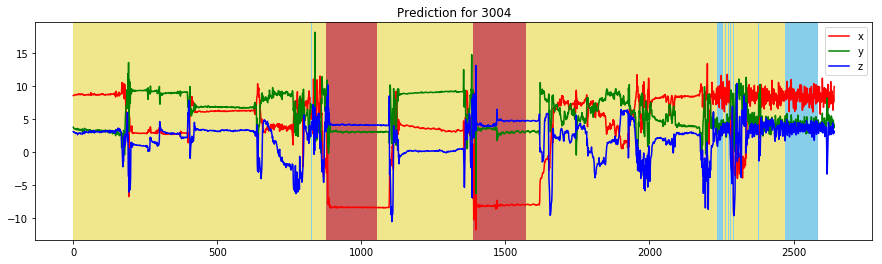

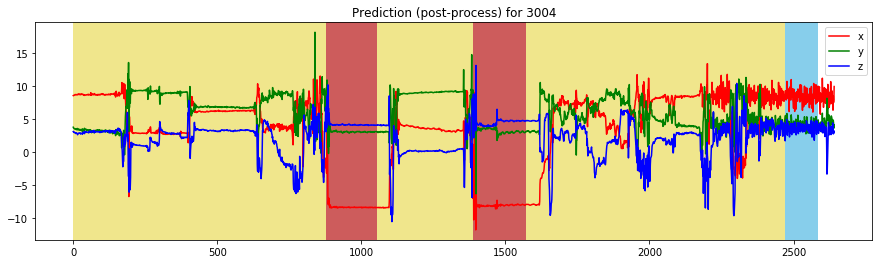

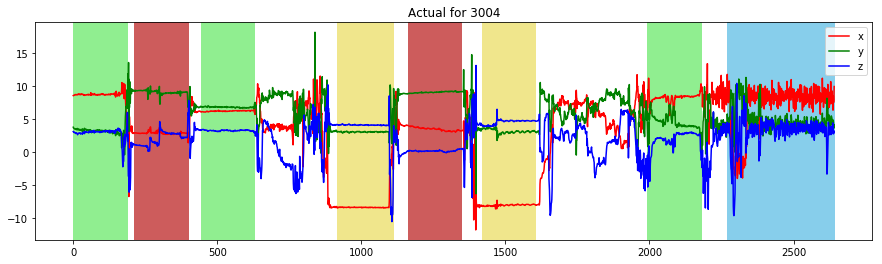

In [39]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca)
df_y = predict(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pred_periods, pp_periods, actual_periods)

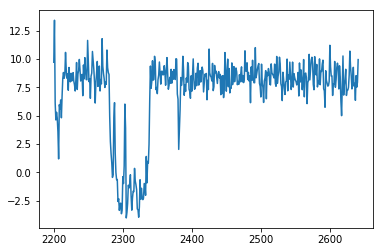

In [40]:
df_test['x'][2200:].plot()

plt.show()

In [45]:
eval_subj(all_subjects)

Finished prediction
Finished prediction
Finished prediction
Finished prediction
Finished prediction
+---------+---------------------+---------------------+
| Subject |      Precision      |       F1-score      |
+---------+---------------------+---------------------+
|   3001  |  0.8116207951070337 |  0.8116207951070337 |
|   3002  | 0.07881773399014778 | 0.07881773399014778 |
|   3003  |  0.8054187192118226 |  0.8054187192118226 |
|   3004  | 0.12277470841006753 | 0.12277470841006753 |
|   3005  | 0.37416331994645247 | 0.37416331994645247 |
+---------+---------------------+---------------------+


# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
print(s)
print(df_y)

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive AC (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()